## ADHS DATENSATZ

- Nicht die Datenwerte normalisieren sondern "MNI Space" verwenden. Hierzu Foto auf Handy.  

- Sind die Atlanten überhautp anwendbar auf Kinder?

(91, 109, 91, 1200)
(160, 240, 256)
(64, 64, 36, 78)
(64, 64, 36, 78)


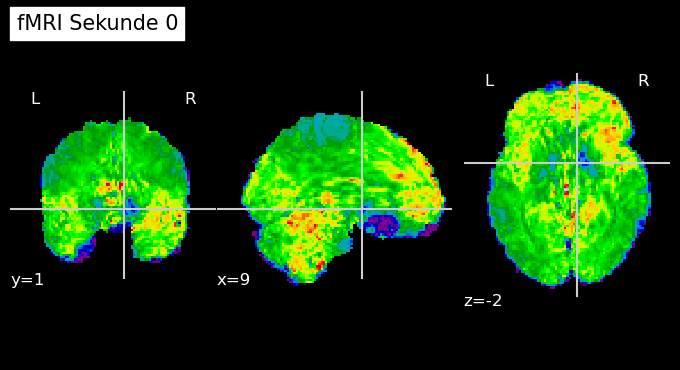

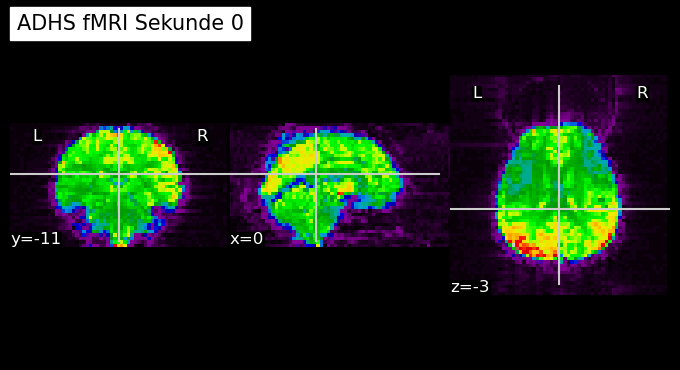

In [2]:
# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib  # Für das Lesen von fMRI-Daten
from nilearn import datasets, image, plotting  # Für die Visualisierung der Gehirnaktivität
from nilearn.connectome import ConnectivityMeasure  # Für die Berechnung der Functional Connectomes
import nibabel as nib


# Lade die fMRI-Daten
file_path = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz/Vorb_Datensatz/F/100307/rfMRI_REST1_LR_hp2000_clean.nii"  # "Pfad_zur_Datei/fMRI_Daten.nii.gz"
fmri_img = nib.load(file_path)

# Laden der fMRI-ADHS-Daten
file_path_adhs_T1w = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_run-1_T1w.nii"
file_path_adhs_bold = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_task-rest_run-1_bold.nii"
fmri_img_adhs_t1w = nib.load(file_path_adhs_T1w)
fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)
fmri_img_adhs2_bold_nifti1 = nib.nifti1.load(file_path_adhs_bold)

print(fmri_img.shape)
print(fmri_img_adhs_t1w.shape)
print(fmri_img_adhs2_bold.shape)
print(fmri_img_adhs2_bold_nifti1.shape)

# Plotten der ursprünglichen fMRI-Daten
plotting.plot_epi(fmri_img.slicer[:, :, :, 0], title='fMRI Sekunde 0')

# Plotten der ADHS-fMRI-Daten
#plotting.plot_epi(fmri_img_adhs_t1w.slicer[:, :, :, 0], title='fMRI Sekunde 0')
plotting.plot_epi(fmri_img_adhs2_bold.slicer[:, :, :, 0], title='ADHS fMRI Sekunde 0')

In [25]:
from nilearn import datasets
dataset_o = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
print(len(dataset_o))

atlas_filename = dataset_o.maps
print(atlas_filename.shape)

labels = dataset_o.labels
print(len(labels))

len(labels) #49 labels -> aber erster Label ist Hintergrund -> nicht relevant => 48 Labels

4
(91, 109, 91)
49


49

- ..._atlas.maps verwenden?


- Pfad zu Atlas und MNI-Space
- Skript anwenden..


"Man muss die Daten skallieren, Atlas ist eigentlich egal. Normalisiert sollten die Daten schon sein."

5
71


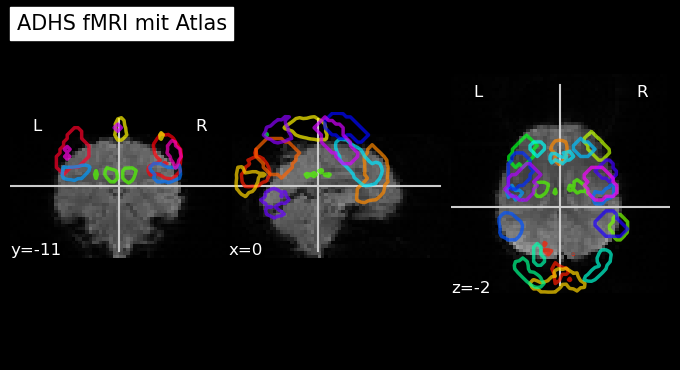

In [49]:
#Laden der ADHS-Daten

# Unterschied zwischen nifti1 und ohne???
#Nifti_img_adhs = nib.nifti1.load(file_path_adhs_bold)
#fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)


msdl_atlas = datasets.fetch_atlas_msdl(data_dir= None)
msdl_coords = msdl_atlas.region_coords
anzahl_regions = len(msdl_coords)
print(len(msdl_atlas))
print(len(msdl_atlas.maps))

plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=fmri_img_adhs2_bold.slicer[:, :, :, 40], title='ADHS fMRI mit Atlas')

In [45]:
import nibabel as nib
from nilearn import datasets, image, plotting

# MNI-Template laden
mni_template = datasets.load_mni152_template()
print(mni_template.shape)

# Resample die fMRI-Daten in den MNI-Raum
fmri_img_mni = image.resample_to_img(fmri_img_adhs2_bold, mni_template)
print(fmri_img_mni.shape)

(197, 233, 189)


/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(


(197, 233, 189, 78)


(91, 109, 91, 1200)
(91, 109, 91)


/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(


(91, 109, 91, 78)


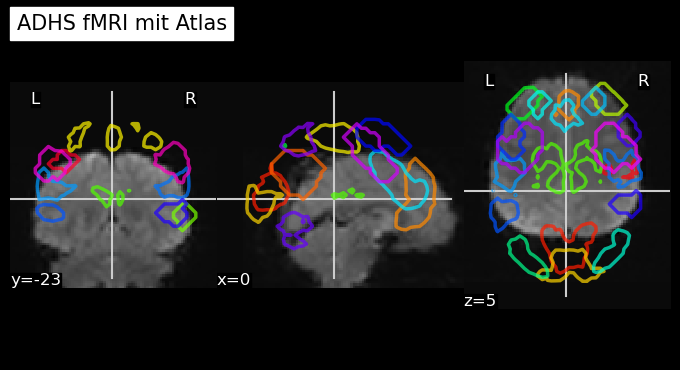

In [55]:
print(fmri_img.shape)
fmri_img_cut = fmri_img.slicer[:,:,:,0]
print(fmri_img_cut.shape)

# Resample die fMRI-Daten in den MNI-Raum
fmri_img_mni_cut = image.resample_to_img(fmri_img_adhs2_bold, fmri_img_cut)
print(fmri_img_mni_cut.shape)

plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=fmri_img_mni_cut.slicer[:, :, :, 40], title='ADHS fMRI mit Atlas')

Das Atlas-Mapping von fMRI-Daten bei Kindern erfordert spezielle Überlegungen, da sich das Gehirn von Kindern in Struktur und Größe von dem eines Erwachsenen unterscheidet. Ein direktes Anwenden eines Erwachsenenatlas auf KinderfMRI-Daten kann zu ungenauen Ergebnissen führen, da die Atlas-Regionen möglicherweise nicht korrekt auf das kindliche Gehirn abgebildet werden. Hier sind einige wichtige Aspekte und Schritte, die Sie berücksichtigen sollten:

Unterschiede zwischen Kinder- und Erwachsenengehirnen:
Größe und Proportionen: Das Gehirn von Kindern ist kleiner und hat andere Proportionen als das von Erwachsenen.
Entwicklungsstadien: Das Gehirn von Kindern durchläuft verschiedene Entwicklungsstadien, was bedeutet, dass bestimmte Strukturen und Verbindungen noch nicht vollständig entwickelt sein können.
Spezielle Atlanten für Kinder:
Für präzisere Analysen sollten Atlanten verwendet werden, die speziell für das kindliche Gehirn erstellt wurden. Diese Atlanten berücksichtigen die Größe und Proportionen des kindlichen Gehirns.

Schritte zur Verwendung von fMRI-Daten von Kindern:
Verwendung eines kinder-spezifischen Atlas:

Suchen Sie nach Atlanten, die speziell für Kinder erstellt wurden, wie z.B. den "UNC Infant Brain Atlas" oder ähnliche.
Vorverarbeitung und Normalisierung:

Stellen Sie sicher, dass die fMRI-Daten ordnungsgemäß vorverarbeitet und normalisiert sind. Verwenden Sie kinder-spezifische Templates für die Normalisierung.


--> sollte Atlas für Kinder gesucht werden. Der für Erwachsenen funktioniert nicht. 